In [1]:
print("Notebook is working!")


Notebook is working!


In [2]:
!pip install pandas numpy matplotlib seaborn scikit-learn xgboost


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 155.4 kB/s eta 0:16:02
   ---------------------------------------- 0.5/150.0 MB 155.4 kB/s 

In [11]:
import pandas as pd 
import numpy as np
import seaborn as snb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso 
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

In [12]:
df = pd.read_csv("gold_price_data.csv")
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [14]:
df.describe()


,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [15]:
    df.isnull().sum()


Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

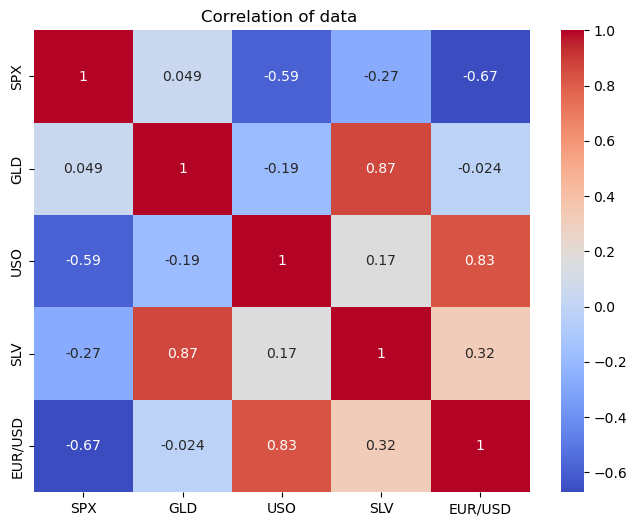

In [16]:
plt.figure(figsize=(8,6))

snb.heatmap(df.drop("Date", axis=1).corr(),annot= True , cmap='coolwarm')
plt.title("Correlation of data ")
plt.show()

In [17]:
df.columns


Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [18]:
df.rename(columns={'GLD': 'Gold Price'}, inplace=True)


In [19]:
X = df.drop(['Date','Gold Price'], axis= 1)
y = df['Gold Price']

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [23]:
print(X.shape)
print(y.shape)



(2290, 4)
(2290,)


In [24]:
print(X_train.shape)
print(y_train.shape)


(458, 4)
(1832,)


In [27]:
#lasso model 
lasso_model = Lasso()
lasso_model.fit(X_train,y_train)

lasso_pred = lasso_model.predict(X_test)
lasso_score = r2_score(y_test, lasso_pred)
print(f"Lasso R2 score : {lasso_score}")

Lasso R2 score : 0.8881050648827646


In [28]:
#Random Forest Regressor model 
rfr_model = RandomForestRegressor()
rfr_model.fit(X_train,y_train)

rfr_pred = rfr_model.predict(X_test)
rfr_score = r2_score(y_test, lasso_pred)
print(f"Random Forest Regressor R2 score : {rfr_score}")

Random Forest Regressor R2 score : 0.8881050648827646


In [29]:
#XGBooster model
xgb_model = XGBRegressor()
xgb_model.fit(X_train,y_train)

xgb_pred = xgb_model.predict(X_test)
xgb_score = r2_score(y_test, lasso_pred)
print(f"XGB R2 score : {xgb_score}")

XGB R2 score : 0.8881050648827646


In [31]:
print(f"Lasso Regressor : {lasso_score} \n Random Forest Regressor : {rfr_score} \n XGB Regressor : {xgb_score}") 

Lasso Regressor : 0.8881050648827646 
 Random Forest Regressor : 0.8881050648827646 
 XGB Regressor : 0.8881050648827646


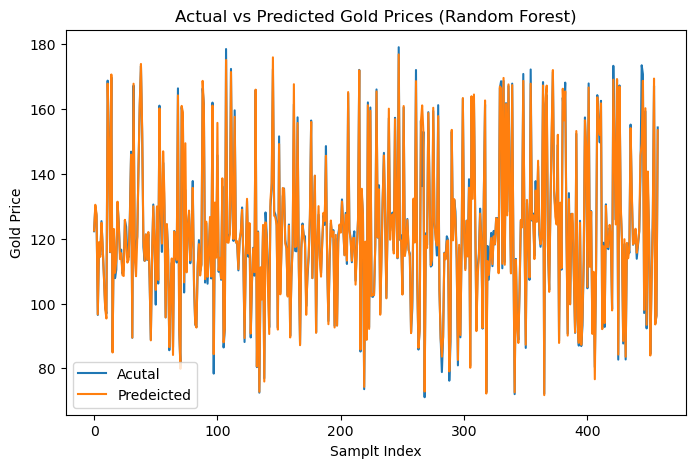

In [34]:
plt.figure(figsize=(8,5))
plt.plot(y_test.values , label = "Acutal")
plt.plot(rfr_pred , label = "Predeicted")
plt.title("Actual vs Predicted Gold Prices (Random Forest)")
plt.xlabel("Samplt Index")
plt.ylabel("Gold Price")
plt.legend()
plt.show()

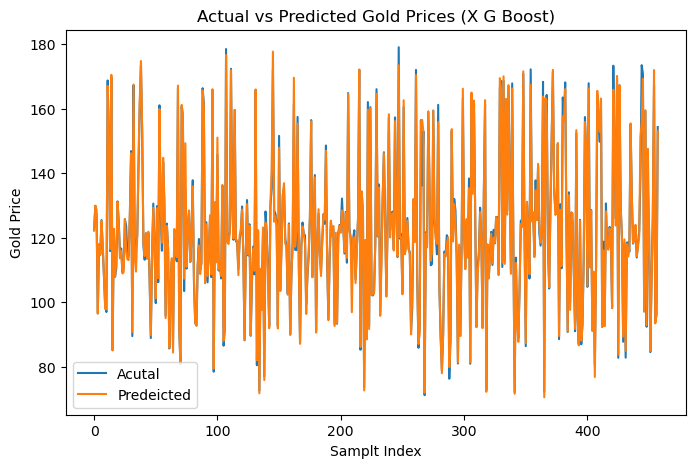

In [35]:
plt.figure(figsize=(8,5))
plt.plot(y_test.values , label = "Acutal")
plt.plot(xgb_pred , label = "Predeicted")
plt.title("Actual vs Predicted Gold Prices (X G Boost)")
plt.xlabel("Samplt Index")
plt.ylabel("Gold Price")
plt.legend()
plt.show()

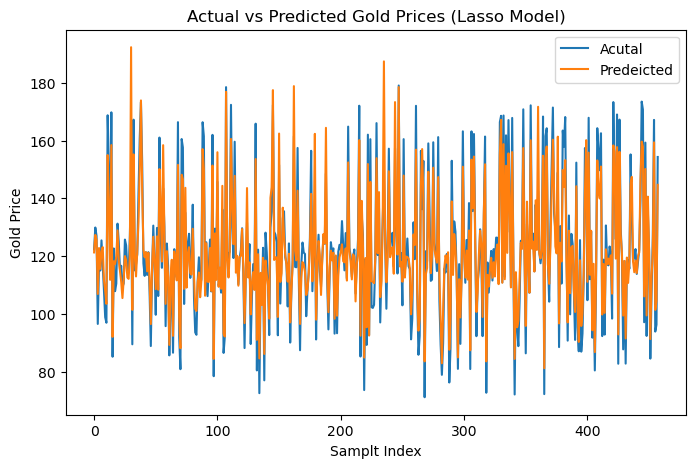

In [36]:
plt.figure(figsize=(8,5))
plt.plot(y_test.values , label = "Acutal")
plt.plot(lasso_pred , label = "Predeicted")
plt.title("Actual vs Predicted Gold Prices (Lasso Model)")
plt.xlabel("Samplt Index")
plt.ylabel("Gold Price")
plt.legend()
plt.show()

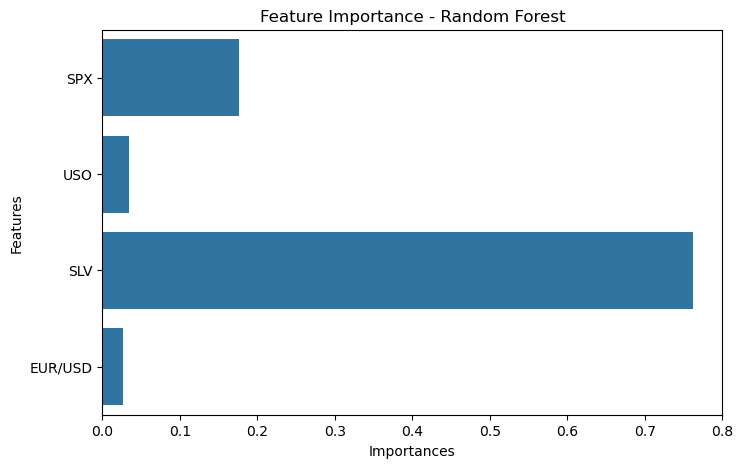

In [42]:
#random forest 
importances = rfr_model.feature_importances_
features = X.columns

plt.figure(figsize=(8,5))
snb.barplot(x=importances , y=features)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importances")
plt.ylabel("Features")
plt.show()

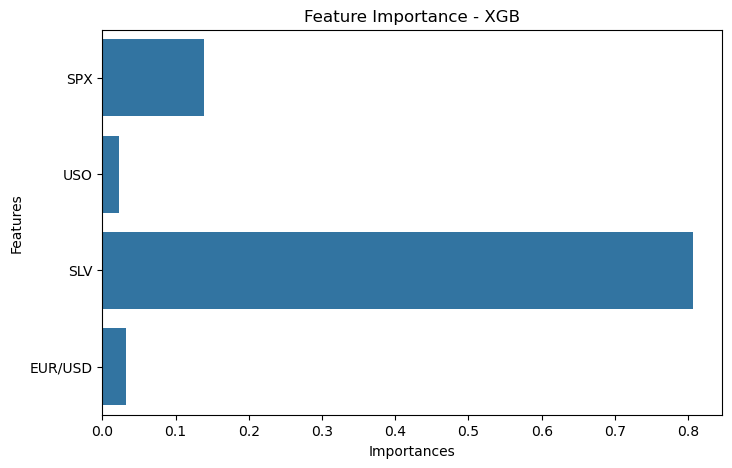

In [44]:
#XGB 
importances = xgb_model.feature_importances_
features = X.columns

plt.figure(figsize=(8,5))
snb.barplot(x=importances , y=features)
plt.title("Feature Importance - XGB")
plt.xlabel("Importances")
plt.ylabel("Features")
plt.show()

In [45]:
plt.savefig("filename.png")


<Figure size 640x480 with 0 Axes>

In [46]:
plt.figure()



<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [47]:
plt.savefig("my_plot.png")


<Figure size 640x480 with 0 Axes>

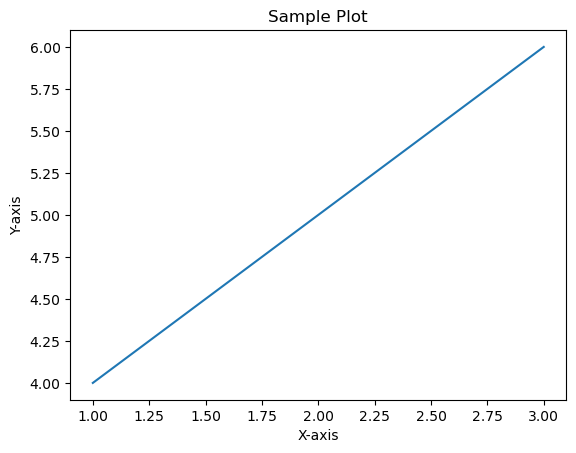

In [48]:
plt.plot([1, 2, 3], [4, 5, 6])
plt.title("Sample Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

plt.savefig("output.png")  
plt.show()                 


In [50]:
plt.savefig("my_plot1.png")


<Figure size 640x480 with 0 Axes>

In [57]:
import joblib

joblib.dump(rfr_model, 'random_forest.pkl')
joblib.dump(lasso_model, 'lasso_model.pkl')
joblib.dump(xgb_model, 'xgboost_model.pkl')


['xgboost_model.pkl']

In [56]:
pip install streamlit
